## PyTorch Tutorial

Train the weights of a third-order polynomial to fit a sin(x) function.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

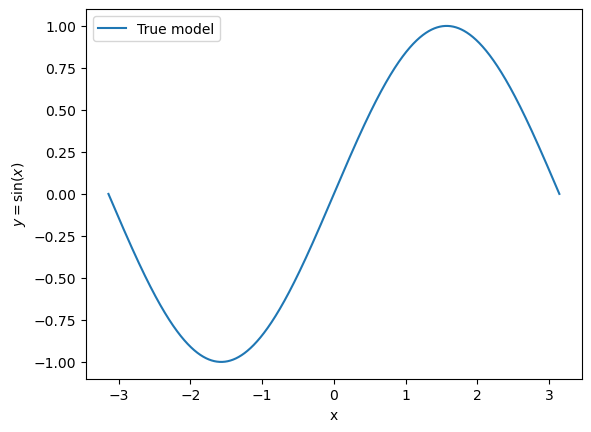

In [3]:
# Create random input-output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, label="True model")
ax.set(xlabel="x", ylabel=r"$y=\sin(x)$")
ax.legend()
plt.show()

99 295.0965352303566
199 199.4764419479967
299 135.85112202730434
399 93.49807432489041
499 65.29341008762796
599 46.502457742185086
699 33.97743207110112
799 25.624841658592455
899 20.05186047365961
999 16.331463867473115
1099 13.846397848781827
1199 12.185489376659344
1299 11.074717534353196
1399 10.331376754016688
1499 9.833584966631133
1599 9.49999187419268
1699 9.276269763642613
1799 9.126115962579245
1899 9.025257502450836
1999 8.957454354941273
Result: y = -0.006776847773677092 + 0.8664275484054216 x + 0.0011691190081930037 x^2 + -0.09470823852145206 x^3


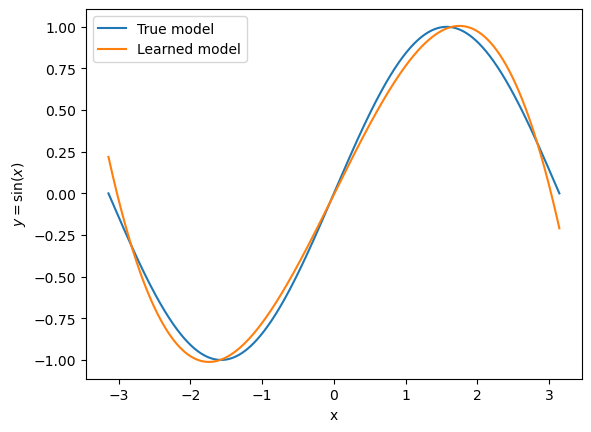

In [7]:
# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_weights = 1e-6

for t in range(2000):
    y_pred = a + b*x + c*x**2 + d*x**3
    loss = np.square(y_pred-y).sum()

    if t % 100 == 99:
        print(t,loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x**2).sum()
    grad_d = (grad_y_pred * x**3).sum()
    
    # Update weights
    a -= learning_weights * grad_a
    b -= learning_weights * grad_b
    c -= learning_weights * grad_c
    d -= learning_weights * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

# Plot prediction
y_pred = a + b * x + c * x ** 2 + d * x ** 3

fig, ax = plt.subplots()
ax.plot(x, y, label="True model")
ax.plot(x, y_pred, label="Learned model")
ax.set(xlabel="x", ylabel=r"$y=\sin(x)$")
ax.legend()
plt.show()
    

### PyTorch Tensors

In [13]:
import torch
import math
dtype = torch.float
device = torch.device("cpu")

In [15]:
# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device = device, dtype = dtype)
y = torch.sin(x)

In [17]:
# Randomly assign weights to the third-order polynomial
a = torch.randn((), device = device, dtype = dtype)
b = torch.randn((), device = device, dtype = dtype)
c = torch.randn((), device = device, dtype = dtype)
d = torch.randn((), device = device, dtype = dtype)

99 427.74090576171875
199 305.2524719238281
299 218.57911682128906
399 157.24830627441406
499 113.84996795654297
599 83.14061737060547
699 61.41020965576172
799 46.033348083496094
899 35.152347564697266
999 27.452693939208984
1099 22.00425910949707
1199 18.148788452148438
1299 15.420547485351562
1399 13.489948272705078
1499 12.123800277709961
1599 11.157068252563477
1699 10.47297477722168
1799 9.988883018493652
1899 9.646319389343262
1999 9.403910636901855
Result: y = -0.025636252015829086 + 0.8563619256019592 x + 0.00442268094047904 x^2 + -0.0932764932513237 x^3


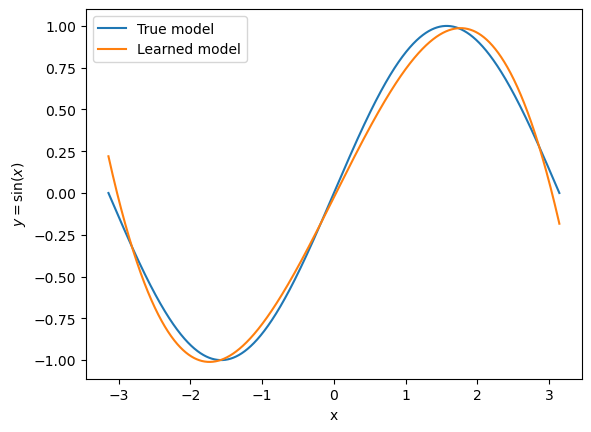

In [18]:
learning_rate = 1e-6

for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

# Plot prediction
y_pred = a + b * x + c * x ** 2 + d * x ** 3

fig, ax = plt.subplots()
ax.plot(x, y, label="True model")
ax.plot(x, y_pred, label="Learned model")
ax.set(xlabel="x", ylabel=r"$y=\sin(x)$")
ax.legend()
plt.show()

### PyTorch: Tensors and Autograd

In [20]:
import torch
import math

dtype = torch.float
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")
torch.set_default_device(device) # uses accelerator if available

Using cpu device


In [22]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

In [23]:
# setting requires_grad = True implies that we need to compute gradients wrt these tensors in the backwards pass
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

In [27]:
learning_rate = 1e-6

for t in range(2000):
    y_pred = a + b*x + c*x**2 + d*x**3
    loss = (y-y_pred).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    loss.backward() 

    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 3604.585205078125
199 2450.3525390625
299 1668.456298828125
399 1138.22119140625
499 778.2576293945312
599 533.6182250976562
699 367.1705322265625
799 253.79505920410156
899 176.48190307617188
999 123.699951171875
1099 87.62439727783203
1199 62.93886184692383
1299 46.02781295776367
1399 34.429466247558594
1499 26.465694427490234
1599 20.991436004638672
1699 17.224136352539062
1799 14.628747940063477
1899 12.838717460632324
1999 11.60285472869873
Result: y = 0.04647710174322128 + 0.8282719254493713 x + -0.00801807176321745 x^2 + -0.08928092569112778 x^3


### Pytorch: nn

In [30]:
import torch
import math

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

In [33]:
p = torch.tensor([1, 2, 3]) # assume a linear layer nn as output y is  a linear function of (x, x^2, x^3)
xx = x.unsqueeze(-1).pow(p)
model = torch.nn.Sequential(torch.nn.Linear(3,1), torch.nn.Flatten(0,1))
loss_fn = torch.nn.MSELoss(reduction = 'sum')

In [36]:
learning_rate = 1e-6

for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)

    if t % 100 == 99:
        print(t, loss.item())

    model.zero_grad()
    loss.backward() # calculates the gradient of the loss wrt the learnable parameters of the modek

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + \
{linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 422.6760559082031
199 282.8030090332031
299 190.2178955078125
399 128.92950439453125
499 88.35540771484375
599 61.49245834350586
699 43.70582962036133
799 31.927616119384766
899 24.12752914428711
999 18.961421966552734
1099 15.539362907409668
1199 13.272356033325195
1299 11.770320892333984
1399 10.775019645690918
1499 10.115389823913574
1599 9.678163528442383
1699 9.388304710388184
1799 9.19610595703125
1899 9.06863784790039
1999 8.984094619750977
Result: y = -0.0032980255782604218 + 0.8445520997047424 x + 0.0005689634126611054 x^2 + -0.09159664809703827 x^3


### PyTorch: optim

99 13353.46484375
199 5281.6875
299 2172.982666015625
399 927.2389526367188
499 383.3327941894531
599 181.83432006835938
699 119.74546813964844
799 84.04734802246094
899 53.1181640625
999 30.111818313598633
1099 16.473161697387695
1199 10.539961814880371
1299 8.987419128417969
1399 8.82158374786377
1499 8.826272010803223
1599 8.826496124267578
1699 9.126346588134766
1799 8.949681282043457
1899 8.937318801879883
1999 8.894050598144531
Result: y = 0.00013812532415613532 + 0.8562887907028198 x + 0.00013800061424262822 x^2 + -0.093783900141716 x^3


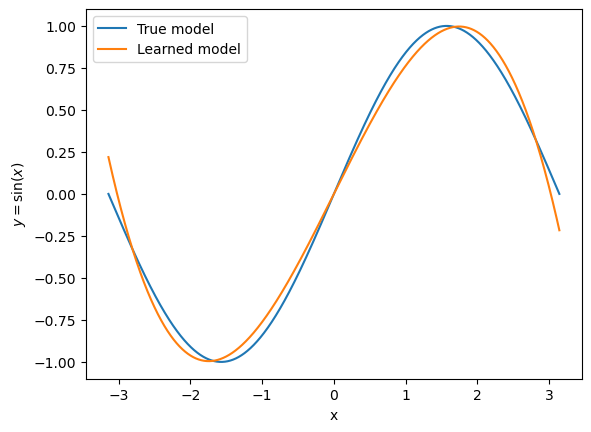

In [3]:
import torch
import math

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

model = torch.nn.Sequential(torch.nn.Linear(3,1), torch.nn.Flatten(0,1))
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate)

for t in range (2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)

    if t % 100 == 99:
        print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

linear_layer = model[0]

print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + \
{linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

# Plot prediction
y_pred = linear_layer.bias.item() + linear_layer.weight[:, 0].item() * x + \
linear_layer.weight[:, 1].item() * x**2 + linear_layer.weight[:, 2].item() * x**3

fig, ax = plt.subplots()
ax.plot(x, y, label="True model")
ax.plot(x, y_pred, label="Learned model")
ax.set(xlabel="x", ylabel=r"$y=\sin(x)$")
ax.legend()
plt.show()